In [1]:
import pandas as pd
import dataframe_image as dfi
import seaborn as sns
import matplotlib.pyplot as plt

df_breaches = pd.read_csv('./20_Jan23.csv')
df_breaches.head()

,Assigned Breach Number,Year,Date Reported To OCA,Organization Name,MA Residents Affected,Breach Occured at Reporting Entity,SSN Breached,Drivers Licenses Breached,Account Number Breached,Credit Debit Numbers Breached,Provided Credit Monitoring,Data Encrypted,Mobile Device Lost Stolen
0,16279,2020,1/2/2020,North Shore Medical Center,1,1,1,0,0,0,1,0,0
1,16280,2020,1/2/2020,Savers Bank,1,0,0,0,0,1,0,0,0
2,16281,2020,1/2/2020,Mutual One Bank,1,0,0,0,0,1,0,0,0
3,16282,2020,1/2/2020,Main Street Bank,1,0,0,0,0,1,0,0,0
4,16283,2020,1/2/2020,Main Street Bank,1,0,0,0,0,1,0,0,0


In [2]:
# show data by year
df_breaches.groupby("Year").sum()

,Assigned Breach Number,MA Residents Affected,Breach Occured at Reporting Entity,SSN Breached,Drivers Licenses Breached,Account Number Breached,Credit Debit Numbers Breached,Provided Credit Monitoring,Data Encrypted,Mobile Device Lost Stolen
Year,,,,,,,,,,
2020,34077847,1071047,1001,996,308,586,878,1135,0,1
2021,49335483,1851100,1452,1360,518,685,836,1548,0,12
2022,54631591,2238759,1343,1234,509,664,696,1372,0,11
2023*,2598425,7767,55,45,17,27,39,48,0,1


In [3]:
# get data to display in summary
total_summary = df_breaches.copy().drop([
    "Assigned Breach Number",
    "Year",
    "Date Reported To OCA",
    "Organization Name",
    "Provided Credit Monitoring", 
    "Data Encrypted", 
    "Mobile Device Lost Stolen"
], axis=1)

# sum residents affected and breach characteristics
total_summary = total_summary.sum()

# get total number of breaches
total_count_col = len(df_breaches)

# get total instances of id/finance breaches
total_id_stolen = total_summary["SSN Breached"] + total_summary["Drivers Licenses Breached"]
total_finance_stolen = total_summary["Account Number Breached"] + total_summary["Credit Debit Numbers Breached"]

# append totals
total_summary = pd.DataFrame(pd.Series({
    "Total # of Breaches": total_count_col,
    "ID Breached": total_id_stolen,
    "Financial Info Breached": total_finance_stolen
}).append(total_summary)).T

# rename index
total_summary = total_summary.rename(index={0: "Count"})

# change col order
total_summary = total_summary.iloc[:, [0, 3, 4, 1, 2, 5, 6, 7, 8]]

# flip cols and rows (better display in appendix)
total_summary = total_summary.T

# export and show table
dfi.export(total_summary, "output/total_summary.png")
total_summary

objc[41060]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa528093f0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/111.0.5563.64/Libraries/libGLESv2.dylib (0x110546850). One of the two will be used. Which one is undefined.
38885 bytes written to file /var/folders/0t/38ktrf9j045g76103925g_x00000gn/T/tmpx9mjk4i7/temp.png


,Count
Total # of Breaches,6366
MA Residents Affected,5168673
Breach Occured at Reporting Entity,3851
ID Breached,4987
Financial Info Breached,4411
SSN Breached,3635
Drivers Licenses Breached,1352
Account Number Breached,1962
Credit Debit Numbers Breached,2449


In [4]:
# get total summary data
total_percent_summary = pd.DataFrame.copy(total_summary.T)
total_count = total_percent_summary["Total # of Breaches"]

# calculate breach characteristics as percentages
for col in range(2, 9):
    percentage = total_percent_summary.iloc[:, col] / total_count  * 100
    total_percent_summary.iloc[:, col] = "{:0.2f}%".format(percentage.Count)

# flip cols and rows (better display in appendix)
total_percent_summary = total_percent_summary.T

# export and show table
dfi.export(total_percent_summary, "output/total_percent_summary.png")
total_percent_summary

objc[41074]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa528093f0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/111.0.5563.64/Libraries/libGLESv2.dylib (0x112891850). One of the two will be used. Which one is undefined.
42418 bytes written to file /var/folders/0t/38ktrf9j045g76103925g_x00000gn/T/tmp_y3f4zem/temp.png


,Count
Total # of Breaches,6366
MA Residents Affected,5168673
Breach Occured at Reporting Entity,60.49%
ID Breached,78.34%
Financial Info Breached,69.29%
SSN Breached,57.10%
Drivers Licenses Breached,21.24%
Account Number Breached,30.82%
Credit Debit Numbers Breached,38.47%


In [5]:
# count MA residents affected by financial breaches
df_fin_stolen = df_breaches.copy().loc[:, [
    "MA Residents Affected", "Account Number Breached", "Credit Debit Numbers Breached"
]]
df_fin_stolen = df_fin_stolen[
    (df_fin_stolen["Account Number Breached"] == 1) | 
    (df_fin_stolen["Credit Debit Numbers Breached"] == 1)
]
df_fin_stolen.sum()

MA Residents Affected            2193000
Account Number Breached             1962
Credit Debit Numbers Breached       2449
dtype: int64

In [6]:
# summarize data breach characteristics by year
summary = df_breaches.groupby("Year").sum()

# get number of breaches per year
total_count_col = df_breaches.groupby("Year").size()
summary.insert(loc = 0, column = "Total # of Breaches", value = total_count_col)

# hide irrelevant data
summary = summary.drop([
    "Assigned Breach Number",
    "Provided Credit Monitoring",
    "Data Encrypted",
    "Mobile Device Lost Stolen"
], axis=1)

summary

,Total # of Breaches,MA Residents Affected,Breach Occured at Reporting Entity,SSN Breached,Drivers Licenses Breached,Account Number Breached,Credit Debit Numbers Breached
Year,,,,,,,
2020,1959,1071047,1001,996,308,586,878
2021,2310,1851100,1452,1360,518,685,836
2022,2007,2238759,1343,1234,509,664,696
2023*,90,7767,55,45,17,27,39


In [7]:
# display summarized data breach characteristics by year by percentage
percent_summary = pd.DataFrame.copy(summary)
total_count = percent_summary["Total # of Breaches"]

# calculate percentages
for col in range(2, 7):
    percentage = percent_summary.iloc[:, col] / total_count  * 100
    percent_summary.iloc[:, col] = percentage.map("{:0.2f}%".format)

# flip cols and rows (better display in appendix)
percent_summary = percent_summary.T 

# export and show table
dfi.export(percent_summary, "output/percent_summary.png")
percent_summary

objc[41085]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa528093f0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/111.0.5563.64/Libraries/libGLESv2.dylib (0x10dea5850). One of the two will be used. Which one is undefined.
53021 bytes written to file /var/folders/0t/38ktrf9j045g76103925g_x00000gn/T/tmpo374bw2b/temp.png


Year,2020,2021,2022,2023*
Total # of Breaches,1959,2310,2007,90
MA Residents Affected,1071047,1851100,2238759,7767
Breach Occured at Reporting Entity,51.10%,62.86%,66.92%,61.11%
SSN Breached,50.84%,58.87%,61.48%,50.00%
Drivers Licenses Breached,15.72%,22.42%,25.36%,18.89%
Account Number Breached,29.91%,29.65%,33.08%,30.00%
Credit Debit Numbers Breached,44.82%,36.19%,34.68%,43.33%


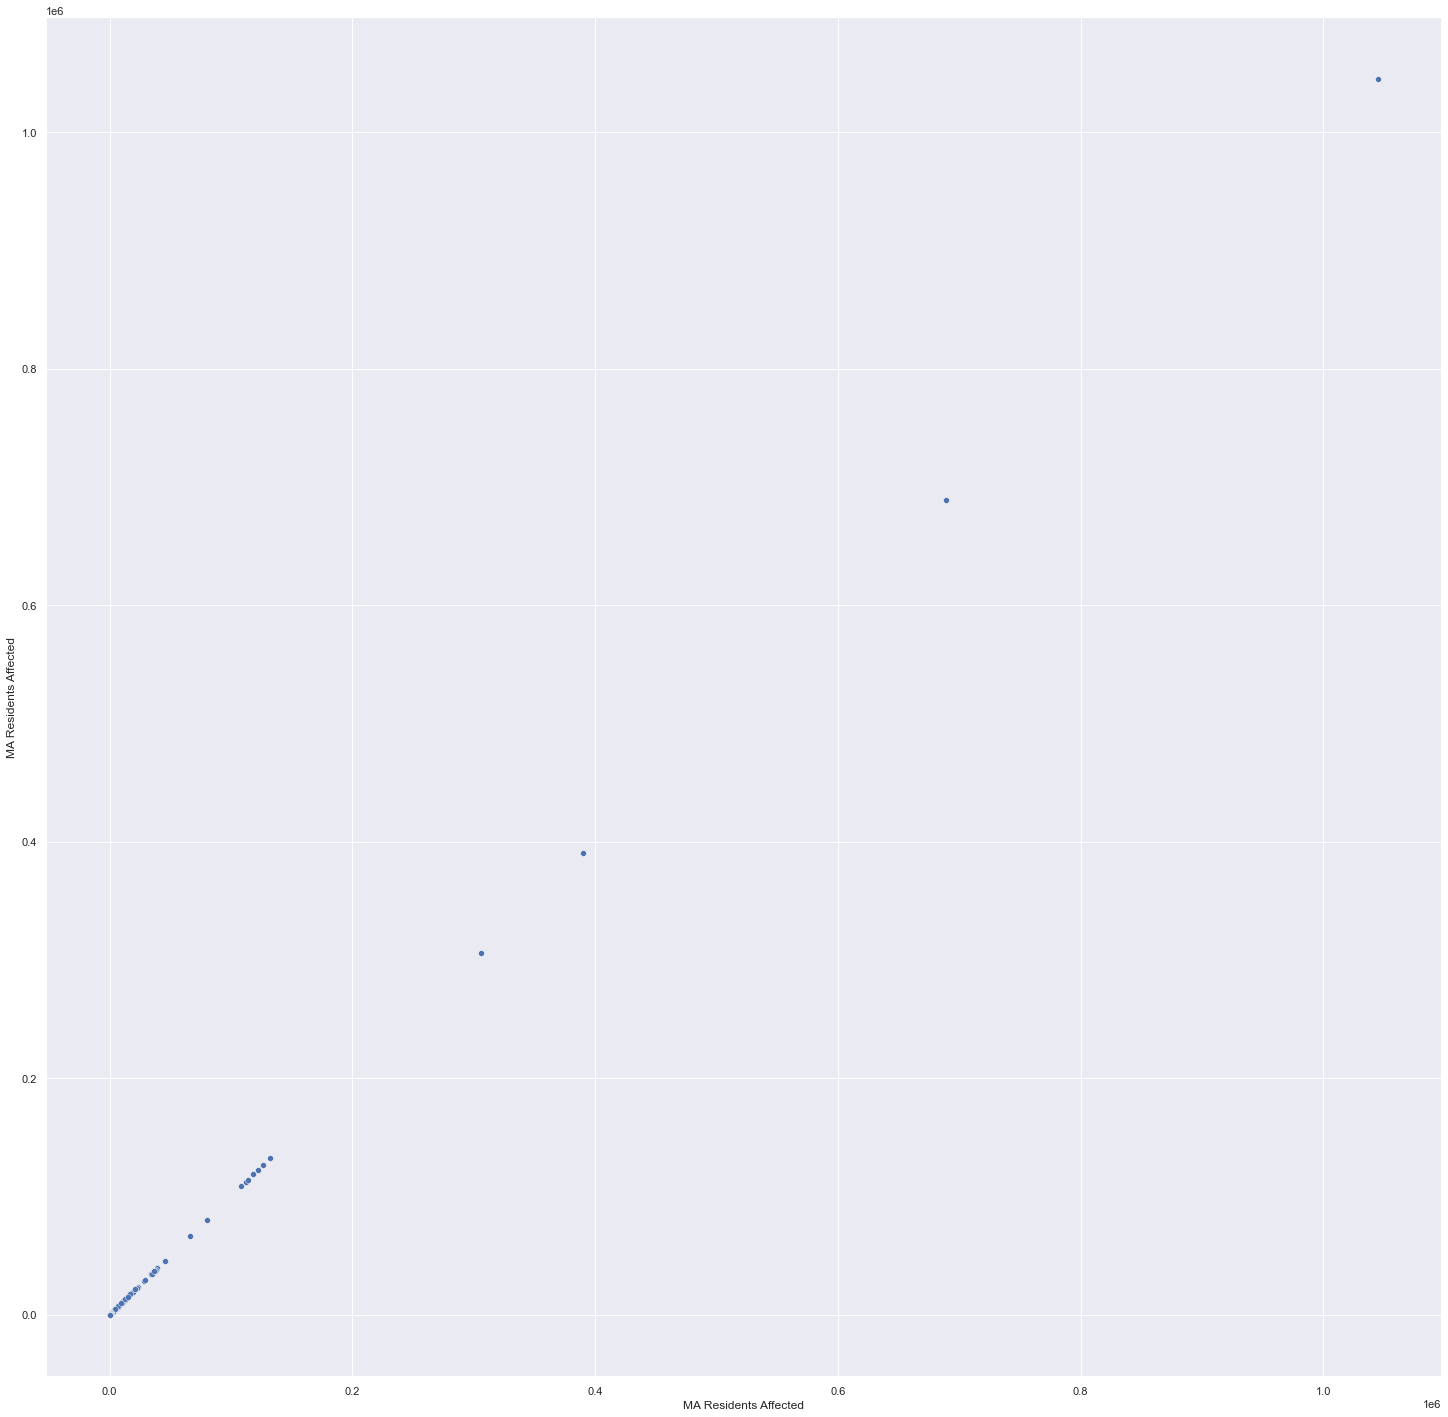

In [8]:
# create scatterplot to determine clusters by # of residents affected
sns.set(rc={'figure.figsize':(25,25)})
scat = sns.scatterplot(
    data = df_breaches, 
    x = "MA Residents Affected", 
    y = "MA Residents Affected"
)

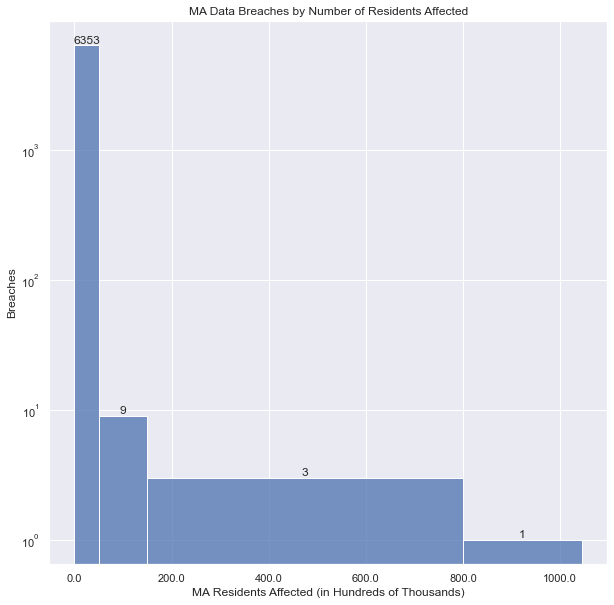

In [9]:
# function to format x-axis numbers
def millions(x, pos):
    return '%1.1f' % (x * 1e-3)

# create a histplot of data breaches using bins found from clusters above
sns.set(rc={'figure.figsize':(10,10)})
hist = sns.histplot(
    data = df_breaches, 
    x = "MA Residents Affected", 
    bins = [0, 50000, 150000, 800000, df_breaches["MA Residents Affected"].max()]
)
hist.set(
    title = "MA Data Breaches by Number of Residents Affected",
    xlabel = "MA Residents Affected (in Hundreds of Thousands)", 
    ylabel = "Breaches", 
    yscale = "log"
)
hist.ticklabel_format(style = "plain", axis = "x")
hist.xaxis.set_major_formatter(millions)
hist.bar_label(hist.containers[0])
plt.savefig("output/breaches_by_count_affected.png", bbox_inches='tight', facecolor = "white")

In [ ]:
# get breaches affecting more than 100,000 residents
top_breaches = df_breaches[df_breaches["MA Residents Affected"] > 100000]
top_breaches = top_breaches.iloc[:, [0, 2, 3, 4]]

# export and show table
dfi.export(top_breaches, "output/top_breaches.png")
top_breaches

objc[41097]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa528093f0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/111.0.5563.64/Libraries/libGLESv2.dylib (0x111bd7850). One of the two will be used. Which one is undefined.
82044 bytes written to file /var/folders/0t/38ktrf9j045g76103925g_x00000gn/T/tmpxm3bj5gq/temp.png
objc[41108]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa528093f0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/111.0.5563.64/Libraries/libGLESv2.dylib (0x108576850). One of the two will be used. Which one is undefined.
82044 bytes written to file /var/folders/0t/38ktrf9j045g76103925g_x00000gn/T/tmpeb